In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split 
from sklearn.impute import SimpleImputer 
from sklearn.compose import ColumnTransformer 

In [5]:
df = pd.read_csv('titanic_toy.csv')
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [7]:
df.isnull().mean()*100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [10]:
x = df.drop(columns = ['Survived'])
y = df['Survived']

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 2)

In [24]:
x_train['Age_99'] = x_train['Age'].fillna(99)
x_train['Age_minus1'] = x_train['Age'].fillna(-1)

x_train['Fare_999'] = x_train['Fare'].fillna(999)
x_train['Fare_minus1'] = x_train['Fare'].fillna(-1)
# here impution with the pandas in the dataframe 

In [23]:
print('Original Age variable variance :,',x_train['Age'].var())
print('Age variance after median imputation ',x_train['Age_99'].var())
print('Age variance after mean imputation',x_train['Age_minus1'].var())


print("Original fare variable variance",x_train['Fare'].var())
print('fare variance after median imputation ',x_train['Fare_999'].var())
print('fare variance after mean imputation',x_train['Fare_minus1'].var())

Original Age variable variance :, 204.3495133904614
Age variance after median imputation  951.7275570187172
Age variance after mean imputation 318.0896202624484
Original fare variable variance 2448.197913706318
fare variance after median imputation  47219.20265217623
fare variance after mean imputation 2378.5676784883503


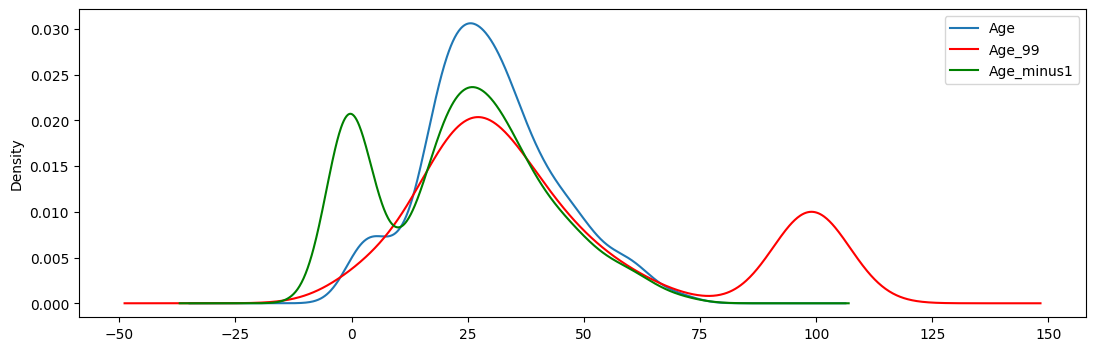

In [26]:
fig = plt.figure(figsize = (13,4))
ax = fig.add_subplot(111)

# original variable distribution 
x_train['Age'].plot(kind = 'kde',ax =ax)

# variable imputed with the median 
x_train['Age_99'].plot(kind = 'kde',ax=ax,color='red')

# variable imputed with the mean 
x_train['Age_minus1'].plot(kind = 'kde',ax = ax,color = 'green')

# add legends 
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc = 'best')

plt.show()

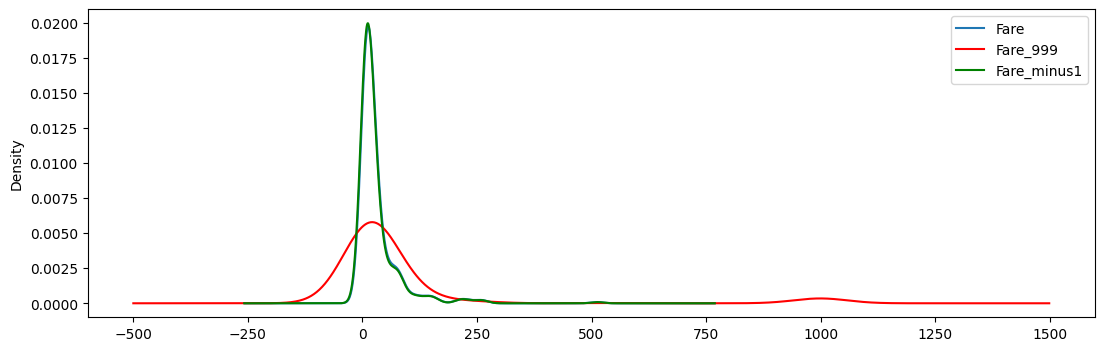

In [29]:
fig = plt.figure(figsize = (13,4))
ax = fig.add_subplot(111)

# original variable distribution 
x_train['Fare'].plot(kind = 'kde',ax =ax)

# variable imputed with the median 
x_train['Fare_999'].plot(kind = 'kde',ax=ax,color='red')

# variable imputed with the mean 
x_train['Fare_minus1'].plot(kind = 'kde',ax = ax,color = 'green')

# add legends 
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc = 'best')

plt.show()

In [30]:
x_train.cov()

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,162.793430,63.321188
Fare,70.719262,2448.197914,17.258917,-101.671097,125.558364,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-7.387287,-4.149246,11.528625,16.553989
Age_99,204.349513,-101.671097,-7.387287,951.727557,-189.535540,-159.931663,-94.317400
Age_minus1,204.349513,125.558364,-4.149246,-189.535540,318.089620,257.379887,114.394141
Fare_999,162.793430,2448.197914,11.528625,-159.931663,257.379887,47219.202652,762.474982
Fare_minus1,63.321188,2448.197914,16.553989,-94.317400,114.394141,762.474982,2378.567678


In [31]:
x_train.corr()

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.051179,0.084585
Fare,0.092644,1.000000,0.208268,-0.066273,0.142022,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.144787,-0.140668,0.032079,0.205233
Age_99,1.000000,-0.066273,-0.144787,1.000000,-0.344476,-0.023857,-0.062687
Age_minus1,1.000000,0.142022,-0.140668,-0.344476,1.000000,0.066411,0.131514
Fare_999,0.051179,1.000000,0.032079,-0.023857,0.066411,1.000000,0.071946
Fare_minus1,0.084585,1.000000,0.205233,-0.062687,0.131514,0.071946,1.000000


# using sklearn

In [32]:
x_trian,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 2)

In [34]:
imputer1 = SimpleImputer(strategy = 'constant',fill_value =99)
imputer2 = SimpleImputer(strategy = 'constant',fill_value =999)

In [42]:
trf = ColumnTransformer([
    ('imputer1',imputer1,[0]),
    ('imputer2',imputer2,[1])
],remainder = 'passthrough')

In [43]:
trf.fit(x_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 [0]),
                                ('imputer2',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 [1])])

In [44]:
trf.named_transformers_['imputer1'].statistics_
# here median of age 

array([99.])

In [45]:
trf.named_transformers_['imputer2'].statistics_
# here median of fare

array([999.])

In [49]:
x_train = trf.transform(x_train)
x_test = trf.transform(x_test)
# here now transform the data i

ValueError: X has 3 features, but ColumnTransformer is expecting 7 features as input.